In [1]:
import pandas as pd

# Tentukan path ke file Excel
file_path = r'D:\SAMUEL\data mentah.xlsx'

# Gunakan pandas untuk membaca file Excel
df = pd.read_excel(file_path)

# Tampilkan isi DataFrame
df.head()


,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,Gedung lawang Sewu merupakan bangunan berlanta...
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,pertama kali masuk lawang sewu cukup bagus dan...
2,15Nisa,"Tangerang, Indonesia",2019-05,4,25 Mei 2019 saat perjalanan mudik ke Jawa Timu...
3,204deddya,"Surabaya, Indonesia",2020-02,5,Cocok untuk wisata edukasi sejarah.kalau mengu...
4,217dwiw,"Solo, Indonesia",2017-07,5,"Karena dekat dengan hotel saya,jadi sekalian a..."


ANALISIS DESKRIPTIF RATING

In [2]:
#Melihat banyak ulasan dari tiap rating

df["Rating"].value_counts()

4    401
5    251
3    117
1      2
2      1
Name: Rating, dtype: int64

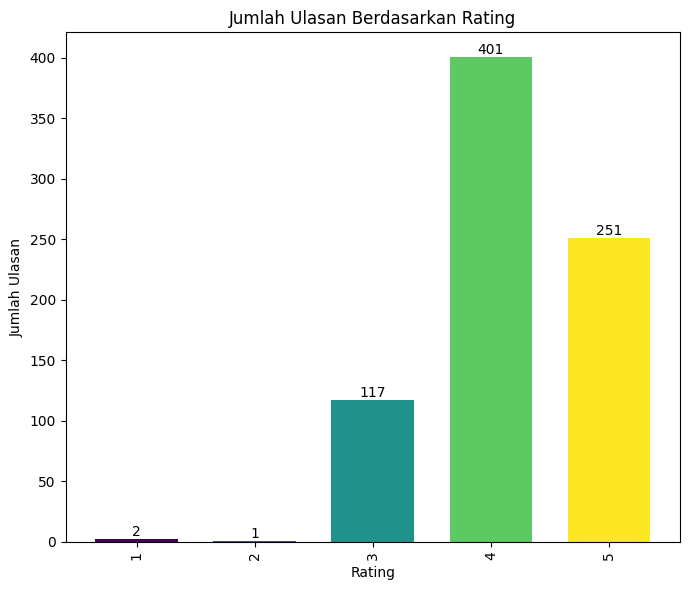

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung jumlah ulasan untuk setiap rating
rating_counts = df['Rating'].value_counts().sort_index()

# Daftar warna yang berbeda untuk setiap bar
colors = plt.cm.viridis(np.linspace(0, 1, len(rating_counts)))

_, ax1 = plt.subplots(figsize=(7, 6))
rating_counts.plot(kind='bar', width=0.7, color=colors)
plt.xlabel('Rating')
plt.ylabel('Jumlah Ulasan')

# Menambahkan nilai aktual di atas setiap bar
for index, value in enumerate(rating_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Menambahkan judul
plt.title('Jumlah Ulasan Berdasarkan Rating')

plt.tight_layout()
plt.show()


ANALISIS DESKRIPTIF LOKASI

In [4]:
#Melihat banyak ulasan dari tiap rating

df["Location"].value_counts()

Jakarta, Indonesia       200
Semarang, Indonesia      113
Surabaya, Indonesia       62
Bandung, Indonesia        37
Yogyakarta, Indonesia     28
                        ... 
Java, Indonesia            1
bandung                    1
Kebumen, Indonesia         1
Jombang, Indonesia         1
Serang, Indonesia          1
Name: Location, Length: 155, dtype: int64

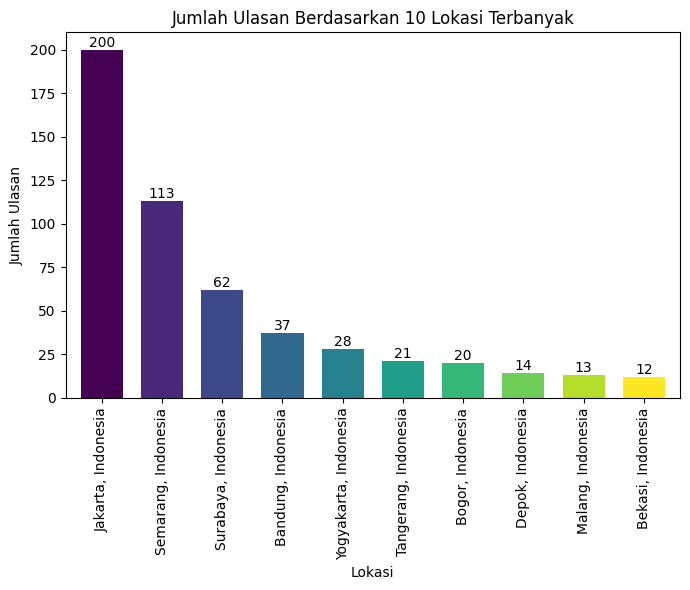

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Mengambil 10 lokasi terbanyak
top_10_locations = df['Location'].value_counts().sort_values(ascending=False).head(10)

# Membuat daftar warna yang berbeda menggunakan palet warna matplotlib
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_locations)))

_, ax1 = plt.subplots(figsize=(7, 6))
top_10_locations.plot(kind='bar', width=0.7, color=colors)
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Ulasan')

# Menambahkan jumlah di atas setiap bar
for index, value in enumerate(top_10_locations):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Menambahkan judul
plt.title('Jumlah Ulasan Berdasarkan 10 Lokasi Terbanyak')


plt.tight_layout()
plt.show()




ANALISIS DESKRIPTIF TAHUN

In [6]:
# Menggunakan regex untuk mengekstrak tahun dari kolom Date
df['Year'] = df['Date'].str.extract(r'(\d{4})')

# Menghitung jumlah ulasan untuk setiap tahun
review_counts_by_year = df['Year'].value_counts().sort_index()

# Menampilkan hasil
print(review_counts_by_year)


2013     21
2014     91
2015    213
2016    163
2017    119
2018     81
2019     69
2020      4
2021      4
2022      1
2023      1
Name: Year, dtype: int64


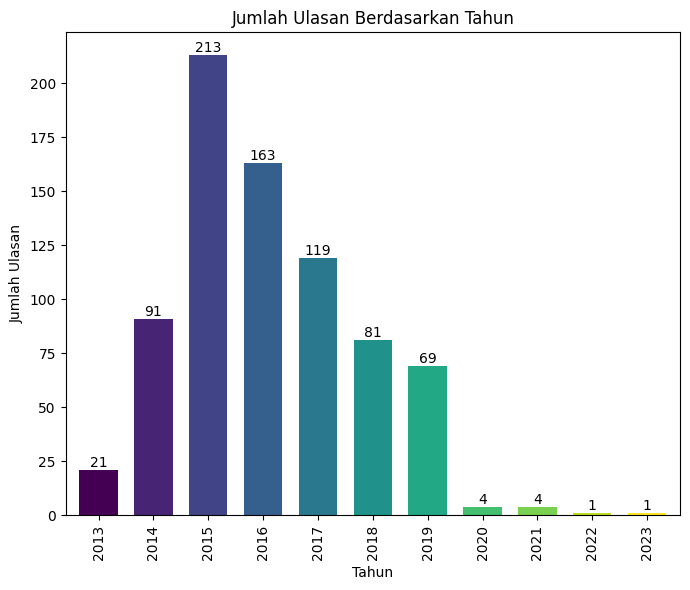

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung jumlah ulasan untuk setiap tahun
review_counts_by_year = df['Year'].value_counts().sort_index()

# Membuat daftar warna yang berbeda menggunakan palet warna matplotlib
colors = plt.cm.viridis(np.linspace(0, 1, len(review_counts_by_year)))

_, ax1 = plt.subplots(figsize=(7, 6))
review_counts_by_year.plot(kind='bar', width=0.7, color=colors)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Ulasan')

# Menambahkan jumlah di atas setiap bar
for index, value in enumerate(review_counts_by_year):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Menambahkan judul
plt.title('Jumlah Ulasan Berdasarkan Tahun')

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd


# Tentukan path ke file Excel
file_path = r'D:\SAMUEL\data mentah.xlsx'


# Gunakan pandas untuk membaca file Excel
df = pd.read_excel(file_path)

# Tampilkan isi DataFrame
df.head()

# menghapus baris jika ada data yang kosong

df = df.dropna()
print(df.shape)


(767, 5)


CASE FOLDING

In [9]:
#CASE FOLDING

#mengubah semua huruf dalam dokumen menjadi huruf kecil (lower text)
df['Reviews'] = df['Reviews'].str.lower()
df.head()


,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,gedung lawang sewu merupakan bangunan berlanta...
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,pertama kali masuk lawang sewu cukup bagus dan...
2,15Nisa,"Tangerang, Indonesia",2019-05,4,25 mei 2019 saat perjalanan mudik ke jawa timu...
3,204deddya,"Surabaya, Indonesia",2020-02,5,cocok untuk wisata edukasi sejarah.kalau mengu...
4,217dwiw,"Solo, Indonesia",2017-07,5,"karena dekat dengan hotel saya,jadi sekalian a..."


In [10]:
df.to_excel('result case folding.xlsx')

CLEANSING

In [11]:
#pembersihan teks dari tab, new life, back slice, mention, link, hastag, URL
import string
import re #regex library


def remove_ulasan_spesial(text):
  #menghapus tab new line dan back slice
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
  #menghapus non ASCII (emoticon, chinese word, etc)
  text = text.encode('ascii','replace').decode('ascii')
  #menghapus mention, link, hastag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",text).split())
  #menghapus incomplete url
  return text.replace("https://"," ").replace("https://"," ")


df['Reviews'] = df['Reviews'].apply(remove_ulasan_spesial)
df.head()


,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,gedung lawang sewu merupakan bangunan berlanta...
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,pertama kali masuk lawang sewu cukup bagus dan...
2,15Nisa,"Tangerang, Indonesia",2019-05,4,25 mei 2019 saat perjalanan mudik ke jawa timu...
3,204deddya,"Surabaya, Indonesia",2020-02,5,cocok untuk wisata edukasi sejarah.kalau mengu...
4,217dwiw,"Solo, Indonesia",2017-07,5,"karena dekat dengan hotel saya,jadi sekalian a..."


In [12]:
df.to_excel('result cleansing.xlsx')

REMOVE NUMBER

In [13]:
#REMOVE NUMBER


def remove_number(text) :
    return re.sub(r"\d+","", text)


df['Reviews'] = df['Reviews'].apply(remove_number)
df.head()


,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,gedung lawang sewu merupakan bangunan berlanta...
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,pertama kali masuk lawang sewu cukup bagus dan...
2,15Nisa,"Tangerang, Indonesia",2019-05,4,mei saat perjalanan mudik ke jawa timur meny...
3,204deddya,"Surabaya, Indonesia",2020-02,5,cocok untuk wisata edukasi sejarah.kalau mengu...
4,217dwiw,"Solo, Indonesia",2017-07,5,"karena dekat dengan hotel saya,jadi sekalian a..."


In [14]:
df.to_excel('result remove number.xlsx')

REMOVE PUNCTUATION

In [15]:
#REMOVE PUNCTUATION


#menghapus tanda baca


def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))


df['Reviews'] = df['Reviews'].apply(remove_punctuation)
df.head()


,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,gedung lawang sewu merupakan bangunan berlanta...
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,pertama kali masuk lawang sewu cukup bagus dan...
2,15Nisa,"Tangerang, Indonesia",2019-05,4,mei saat perjalanan mudik ke jawa timur meny...
3,204deddya,"Surabaya, Indonesia",2020-02,5,cocok untuk wisata edukasi sejarahkalau mengun...
4,217dwiw,"Solo, Indonesia",2017-07,5,karena dekat dengan hotel sayajadi sekalian aj...


In [16]:
df.to_excel('result remove punctuation.xlsx')


REMOVE SINGLE CHARACTER

In [17]:
#Menghapus huruf tunggal

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

df['Reviews'] = df['Reviews'].apply(remove_single_char)
df.head()

,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,gedung lawang sewu merupakan bangunan berlanta...
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,pertama kali masuk lawang sewu cukup bagus dan...
2,15Nisa,"Tangerang, Indonesia",2019-05,4,mei saat perjalanan mudik ke jawa timur meny...
3,204deddya,"Surabaya, Indonesia",2020-02,5,cocok untuk wisata edukasi sejarahkalau mengun...
4,217dwiw,"Solo, Indonesia",2017-07,5,karena dekat dengan hotel sayajadi sekalian aj...


In [18]:
df.to_excel('hasil remove single char.xlsx')

REMOVE SHORT WORDS

In [19]:
#REMOVE SHORT WORDS

#menghapus kata-kata pendek (kurang dari 3 huruf)

df['Reviews'] = df['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df.head()

,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,gedung lawang sewu merupakan bangunan berlanta...
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,pertama kali masuk lawang sewu cukup bagus dan...
2,15Nisa,"Tangerang, Indonesia",2019-05,4,mei saat perjalanan mudik jawa timur menyempat...
3,204deddya,"Surabaya, Indonesia",2020-02,5,cocok untuk wisata edukasi sejarahkalau mengun...
4,217dwiw,"Solo, Indonesia",2017-07,5,karena dekat dengan hotel sayajadi sekalian ke...


In [20]:
df.to_excel('hasil short words.xlsx')

TOKENIZING

In [21]:
#pemisahan teks menjadi potongan-potongan kata yang disebut token

from nltk.tokenize import word_tokenize

#NLTK word tokenize
def word_tokenize_wrapper(text) :
    return word_tokenize(text)

df['Reviews'] = df['Reviews'].apply(word_tokenize_wrapper)
df.head()

,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,"[gedung, lawang, sewu, merupakan, bangunan, be..."
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,"[pertama, kali, masuk, lawang, sewu, cukup, ba..."
2,15Nisa,"Tangerang, Indonesia",2019-05,4,"[mei, saat, perjalanan, mudik, jawa, timur, me..."
3,204deddya,"Surabaya, Indonesia",2020-02,5,"[cocok, untuk, wisata, edukasi, sejarahkalau, ..."
4,217dwiw,"Solo, Indonesia",2017-07,5,"[karena, dekat, dengan, hotel, sayajadi, sekal..."


In [22]:
df.to_excel('hasil tokenizing.xlsx')

SPELL NORMALIZATION

In [23]:
#menyeragamkan kata yang memiliki makna yang sama namun penulisannya berbeda

# Tentukan path ke file Excel
file_path_normalisasi = r'D:\SAMUEL\new_kamusalay.xlsx'


normalizad_word = pd.read_excel(file_path_normalisasi)
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
   if row[0] not in normalizad_word_dict: 
     normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
   return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term  in document]

df["Reviews"] = df["Reviews"].apply(normalized_term)
df.head()


,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,"[gedung, lawang, sewu, merupakan, bangunan, be..."
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,"[pertama, kali, masuk, lawang, sewu, cukup, ba..."
2,15Nisa,"Tangerang, Indonesia",2019-05,4,"[mei, saat, perjalanan, mudik, jawa, timur, me..."
3,204deddya,"Surabaya, Indonesia",2020-02,5,"[cocok, untuk, wisata, edukasi, sejarahkalau, ..."
4,217dwiw,"Solo, Indonesia",2017-07,5,"[karena, dekat, dengan, hotel, sayajadi, sekal..."


In [24]:
df.to_excel('Hasil normalisasi.xlsx')

FILTERING

In [25]:
import pandas as pd
from nltk.corpus import stopwords

# Import stopwords from NLTK
list_stopwords = stopwords.words('indonesian')

# Menambahkan stopword tambahan
list_stopwords.extend(['pas', 'ya', 'sih', 'deh', 'loh', 'oiya', 'nih', 'oke', 'ah', 'ok', 'lawang', 'sewu', 'semarang', 'belanda', 'nya'])

# Membaca stopword dari file Excel
txt_stopword = pd.read_excel('D:/SAMUEL/Stopwords Indonesia.xlsx', names=['stopwords'], header=None)

# Mengambil kata-kata dari file Excel dan mengkonversi ke list
additional_stopwords = txt_stopword['stopwords'][0].split(' ')

# Menambahkan kata-kata yang mengandung "di" dari file Excel ke dalam list_stopwords
list_stopwords.extend([word for word in additional_stopwords if 'di' in word])

# Mengonversi list ke set
list_stopwords = set(list_stopwords)

# Menghapus kata-kata yang mengandung "di"
def stopwords_removal(words):
    return [word for word in words if all(stop not in word for stop in list_stopwords)]

# Apply stopwords removal to the 'Reviews' column in your DataFrame
df['Reviews'] = df['Reviews'].apply(stopwords_removal)
df.head()


,Name,Location,Date,Rating,Reviews
0,_azs_saranajasa,"Depok, Indonesia",2016-07,4,"[gedung, berlantai, bangun, jendela, jendela, ..."
1,12brian_k235,"Jakarta, Indonesia",2015-11,4,"[kali, masuk, bagus, spot, spot, foto, menarik..."
2,15Nisa,"Tangerang, Indonesia",2019-05,4,"[mei, jawa, timur, mampir, berkunjung, berfoto..."
3,204deddya,"Surabaya, Indonesia",2020-02,5,"[wisata, edukasi, mengunjungi, anak]"
4,217dwiw,"Solo, Indonesia",2017-07,5,"[hotel, malam, giman, bagus, anakku]"


In [26]:
df.to_excel('Hasil Filtering.xlsx')

In [27]:
df.to_excel("Hasil Prepocessing Indonesia.xlsx")

In [28]:
import pandas as pd

# Ganti lokasi file Excel jika perlu
file_path = 'D:/Semester 7/Tugas Akhir/Jupiter Samuel/Hasil Prepocessing Indonesia.xlsx'

# Membaca data dari file Excel dan mengambil kolom 'Name', 'Rating', dan 'Reviews'
df = pd.read_excel(file_path, usecols=['Name', 'Rating', 'Reviews'])

# Mengganti nama kolom sesuai yang Anda inginkan
df.columns = ['Name ', 'Rating', 'Reviews']

# Menampilkan lima baris pertama dari dataframe
df.head()


,Name,Rating,Reviews
0,_azs_saranajasa,4,"['gedung', 'berlantai', 'bangun', 'jendela', '..."
1,12brian_k235,4,"['kali', 'masuk', 'bagus', 'spot', 'spot', 'fo..."
2,15Nisa,4,"['mei', 'jawa', 'timur', 'mampir', 'berkunjung..."
3,204deddya,5,"['wisata', 'edukasi', 'mengunjungi', 'anak']"
4,217dwiw,5,"['hotel', 'malam', 'giman', 'bagus', 'anakku']"


In [29]:
#Menggabungkan daftar token menjadi dokumen string tunggal

import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["Reviews"] = df['Reviews'].apply(join_text_list)
df.head()


,Name,Rating,Reviews
0,_azs_saranajasa,4,gedung berlantai bangun jendela jendela pintu ...
1,12brian_k235,4,kali masuk bagus spot spot foto menarik gedung
2,15Nisa,4,mei jawa timur mampir berkunjung berfoto luas ...
3,204deddya,5,wisata edukasi mengunjungi anak
4,217dwiw,5,hotel malam giman bagus anakku


In [30]:
df.to_excel("Hasil Indonesia.xlsx")

In [31]:
import difflib

review_text_list = df['Reviews'].tolist()

reviews = review_text_list
s = difflib.SequenceMatcher(None, reviews).ratio()
print("ratio:", s, '\n')

ratio: 0.0 



FREKUENSI TFIDF

In [32]:
from nltk import FreqDist
import seaborn as sns

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count':list(fdist.values())})

    #memilih 25 term yang paling sering muncul
    d = words_df.nlargest(columns="count", n = terms)
    plt.figure(figsize=(25,7))
    ax = sns.barplot(data=d, x='word', y='count')
    ax.set(ylabel = 'count')
    plt.show()

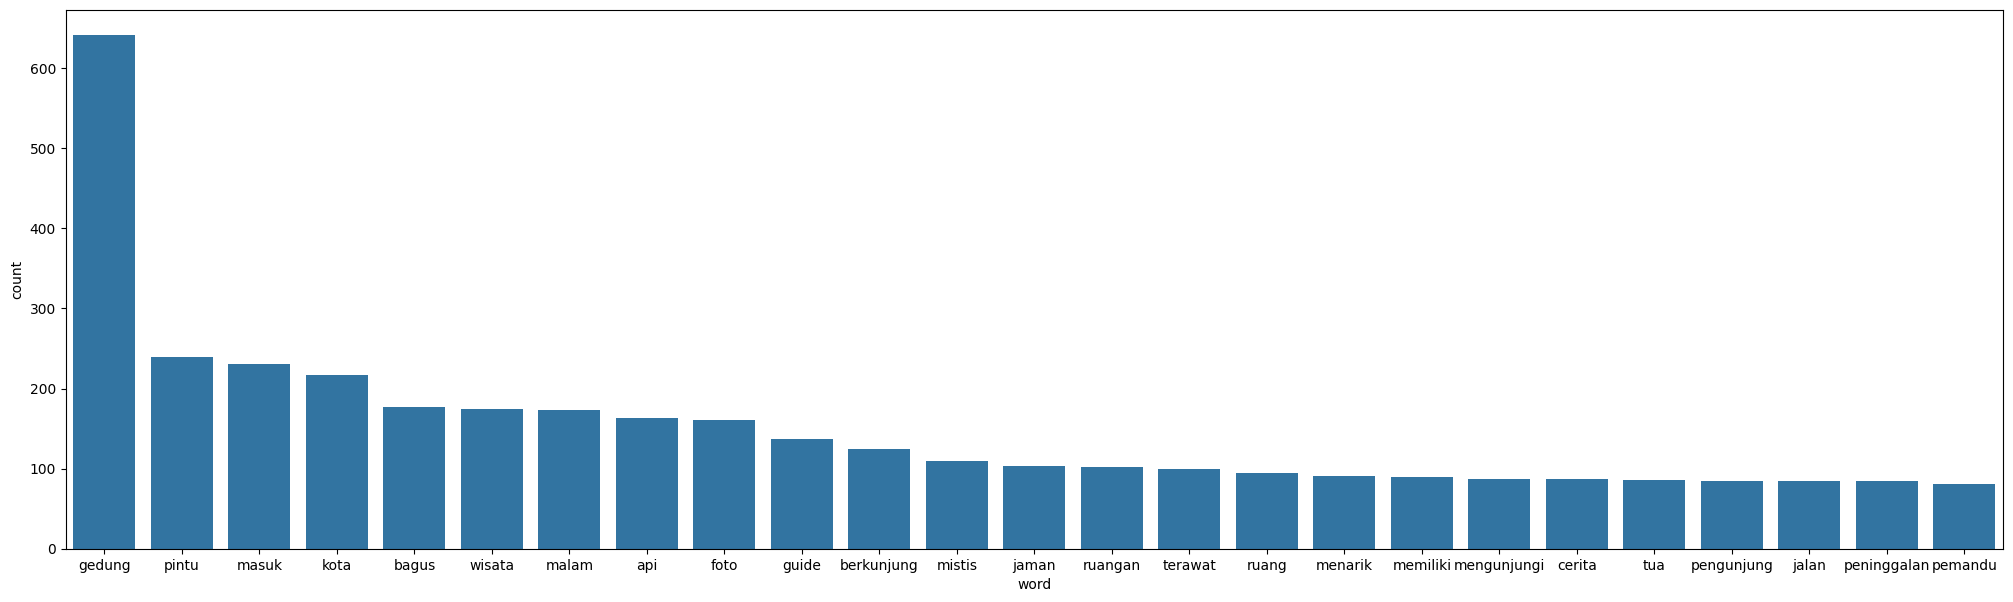

In [33]:
#plot term yang paling sering

freq_words(df['Reviews'],25)

PEMBOBOTAN

In [34]:
#Pembobotan Kata 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')

In [35]:
#Menghitung semua n-gram yang ditemukan di semua dokumen

from itertools import islice
from nltk.corpus import stopwords
global str

cvec.fit(review_text_list)
list(islice(cvec.vocabulary_.items(), 20))

len(cvec.vocabulary_)

9045

In [36]:
cvec_counts = CountVectorizer(stop_words='english', min_df=.0025, max_df=.5, ngram_range=(1,2))
cvec.fit(review_text_list)
len(cvec.vocabulary_)

9045

In [37]:
cvec_counts = cvec.transform(review_text_list)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (767, 9045)
nonzero count: 19271
sparsity: 0.28%


In [38]:
#Menghitung frekuensi kemunculan term
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term' : cvec.get_feature_names_out(), 'occurences': occ})
counts_df.sort_values(by='occurences', ascending=False).head(20)

,term,occurences
2198,gedung,641
6720,pintu,240
4600,masuk,231
3705,kota,217
562,bagus,177
8876,wisata,175
4432,malam,173
199,api,163
2003,foto,161
2525,guide,137


In [39]:
#Sekarang kita memiliki jumlah term untuk setiap dokumen kita dapat menggunakan tfidf transformer untuk menghitung
#bobot untuk setiap isitlah dalam setiap dokumen

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<767x9045 sparse matrix of type '<class 'numpy.float64'>'
	with 19271 stored elements in Compressed Sparse Row format>

In [40]:
#melihat 20 term teraatas dengan weight rata-rata tf-idf

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names_out(), 'weight' : weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
2198,gedung,0.049580
3705,kota,0.026368
562,bagus,0.025000
6720,pintu,0.024927
4600,masuk,0.023933
4432,malam,0.022544
8876,wisata,0.022431
2003,foto,0.020813
199,api,0.018758
2525,guide,0.017633


PELABELAN

In [41]:
#membuat kamus kata

word_dict = {}
for i in range(0, len(df['Reviews'])):
    sentence = df['Reviews'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [42]:
len(word_dict)

1794

In [43]:
len({k:v for (k,v) in word_dict.items() if v < 4})

1368

In [44]:
import pandas as pd

# Daftar kata-kata negasi
negasi = ['bukan', 'tidak', 'ga', 'gk']

# Impor lexicon dari file Excel
lexicon = pd.read_excel('D:/SAMUEL/full_lexicon.xlsx')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')
                               |(lexicon['word']== 'gk')].index,axis=0)
lexicon = lexicon.reset_index(drop=True)


In [45]:
len(lexicon)

10284

In [46]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [47]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [48]:
len(lexicon_word)

10284

In [49]:
#memeriksa apakah ada kata dalam kamus yang tidak termasuk dalam lexicon

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    kata_dasar = stemmer.stem(word)
    if kata_dasar not in lexicon_word:
        ns_words.append(word)
len(ns_words)

1180

In [50]:
#melihat jenis kata,dimulai dengan beberapa kata yang memiliki banyak kemungkinan karena kemungkinan besar ini bukan tipe case

len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))})

222

In [51]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

In [52]:
#Ternyata kata-kata yang tidak termasuk dalam lexion, adalah kata yang tidak memiliki arti sentimen

sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders = sort_orders[0:20]
for i in sort_orders:

    print(i[0], i[1])

gedung 641
pintu 240
wisata 175
guide 137
mistis 110
mengunjungi 87
pengunjung 85
jalan 84
kali 77
tour 72
orang 71
spot 61
tugu 59
area 54
lantai 52
sore 48
zaman 47
jendela 43
unik 43
jam 43


In [53]:
#sentimen

lexicon['number_of_words'].value_counts()

1    9544
2     684
3      26
4      25
5       5
Name: number_of_words, dtype: int64

In [54]:
'pakerti' in word_dict

False

In [55]:
'budi baik' in lexicon_word

False

In [56]:
import numpy as np
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

# Menghitung sentimen kata dengan menghitungnya menjadi lexicon
sencol = []
senrow = np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []

# Fungsi untuk menuliskan sentimen kata jika sudah ditemukan
def found_word(ind, words, word, sen, sencol, sentiment, add):
    # Jika sudah termasuk dalam bag of words matrix, maka naikkan (tambahkan) saja nilai
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
        # Jika tidak, maka tambahkan kata baru
        sencol.append(word)
        sen.append(1)
        add += 1
    # Jika ada kata negasi sebelumnya, sentimen adalah negasi sentimennya
    if (words[ind - 1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]

    return sen, sencol, sentiment, add

# Memeriksa setiap kata, jika muncul dalam lexicon dan kemudian menghitung sentimennya
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['Reviews'][i])
    sentiment = 0
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol) > 0:
        sen = [0 for j in range(len(sencol))]
    else:
        sen = []

    for word in words:
        ind = words.index(word)
        # Periksa apakah mereka termasuk dalam lexicon
        if word in lexicon_word:
            sen, sencol, sentiment, add = found_word(ind, words, word, sen, sencol, sentiment, add)
        else:
            # Jika tidak, maka periksa kata dasarnya
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen, sencol, sentiment, add = found_word(ind, words, kata_dasar, sen, sencol, sentiment, add)
            # Jika masih negatif, coba cocokkan kombinasi kata dengan kata yang berdekatan
            elif n_words > 1:
                if ind - 1 > -1:
                    back_1 = words[ind - 1] + ' ' + word
                    if back_1 in lexicon_word:
                        sen, sencol, sentiment, add = found_word(ind, words, back_1, sen, sencol, sentiment, add)
                    elif ind - 2 > -1:
                        back_2 = words[ind - 2] + ' ' + back_1
                        if back_2 in lexicon_word:
                            sen, sencol, sentiment, add = found_word(ind, words, back_2, sen, sencol, sentiment, add)

    # Jika ada kata baru yang ditemukan, maka perluas matriks
    if add > 0:
        if i > 0:
            if (nsen == 0):
                senrow = np.zeros([i, add], dtype=int)
            elif (i != nsen):
                padding_h = np.zeros([nsen, add], dtype=int)
                senrow = np.hstack((senrow, padding_h))
                padding_v = np.zeros([(i - nsen), senrow.shape[1]], dtype=int)
                senrow = np.vstack((senrow, padding_v))
            else:
                padding = np.zeros([nsen, add], dtype=int)
                senrow = np.hstack((senrow, padding))
            senrow = np.vstack((senrow, sen))
        if i == 0:
            senrow = np.array(sen).reshape(1, len(sen))
    # Jika tidak ada maka perbaharui saja matriks lama
    elif (nsen > 0):
        senrow = np.vstack((senrow, sen))

    sentiment_list.append(sentiment)


In [57]:
#membangun kerangka data yang berisi kumpulan kata dan sentimen yang telah dihitung sebelumnya

sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)


In [58]:
df_sen.head(5)

,masuk,bagus,foto,menarik,mampir,berkunjung,luas,rawat,asri,musik,...,redup,memegang,memfasilitasi,natural,kreativitas,pusing,terkoneksi,bantalan,obrolan,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,1,0,1,0,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-3
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


In [65]:
#Melihat sentimen dari data orginal

res_df = pd.DataFrame([])
res_df['Rating'] = df['Rating'].copy()
res_df['Name'] = df['Name '].copy()
res_df['Reviews'] = df['Reviews'].copy()
res_df['sentiment'] = df_sen['sentiment'].copy()

In [66]:
res_df.head()

,Rating,Name,Reviews,sentiment
0,4,_azs_saranajasa,gedung berlantai bangun jendela jendela pintu ...,0
1,4,12brian_k235,kali masuk bagus spot spot foto menarik gedung,6
2,4,15Nisa,mei jawa timur mampir berkunjung berfoto luas ...,2
3,5,204deddya,wisata edukasi mengunjungi anak,-3
4,5,217dwiw,hotel malam giman bagus anakku,-1


In [67]:
#mengubah penilaian menjadi label 
#pelabelan data,data akan berlabel negatif(0) jika nilai compound <0,0 dan akan bernilai positif(1) jika nilai compound >=0,0

label = []
for index, row in res_df.iterrows():
    if row['sentiment'] >= 0:
        label.append(1)
    else:
        label.append(0)
res_df['label'] = label
res_df = res_df.drop(columns=['sentiment'])
res_df.head()

,Rating,Name,Reviews,label
0,4,_azs_saranajasa,gedung berlantai bangun jendela jendela pintu ...,1
1,4,12brian_k235,kali masuk bagus spot spot foto menarik gedung,1
2,4,15Nisa,mei jawa timur mampir berkunjung berfoto luas ...,1
3,5,204deddya,wisata edukasi mengunjungi anak,0
4,5,217dwiw,hotel malam giman bagus anakku,0


In [69]:
#melihat banyak ulasan dari tiap label

res_df['label'].value_counts()

1    521
0    246
Name: label, dtype: int64

METODE KLASIFIKASI

In [71]:
klasifikasiLawangSewu = res_df
klasifikasiLawangSewu = res_df.drop(columns=['Rating','Name'])
klasifikasiLawangSewu.head()

,Reviews,label
0,gedung berlantai bangun jendela jendela pintu ...,1
1,kali masuk bagus spot spot foto menarik gedung,1
2,mei jawa timur mampir berkunjung berfoto luas ...,1
3,wisata edukasi mengunjungi anak,0
4,hotel malam giman bagus anakku,0


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [73]:
#DATA TRAINING DAN DATA TESTING

#data training dan data testing
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(klasifikasiLawangSewu['Reviews'],klasifikasiLawangSewu['label'],test_size=0.2, random_state=8)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(klasifikasiLawangSewu['Reviews'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [79]:
len(Train_X)

613

In [78]:
len(Test_X)

154

In [75]:
len(Train_Y)

613

In [80]:
len(Test_Y)

154

SUPPORT VECTOR MACHINE

In [81]:
#Support Vector Mechine

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale')
SVM.fit(Train_X_Tfidf, Train_Y)

predictions_SVM = SVM.predict(Test_X_Tfidf)

print("SVM Accuracy Score ->",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score -> 81.81818181818183


NAIVE BAYES

In [82]:
#NAIVE BAYES

from sklearn import naive_bayes
NB = naive_bayes.MultinomialNB()
NB.fit(Train_X_Tfidf,Train_Y)

predictions_NB = NB.predict(Test_X_Tfidf)

print('NB Accuracy Score ->',accuracy_score(predictions_NB, Test_Y)*100)

NB Accuracy Score -> 63.63636363636363


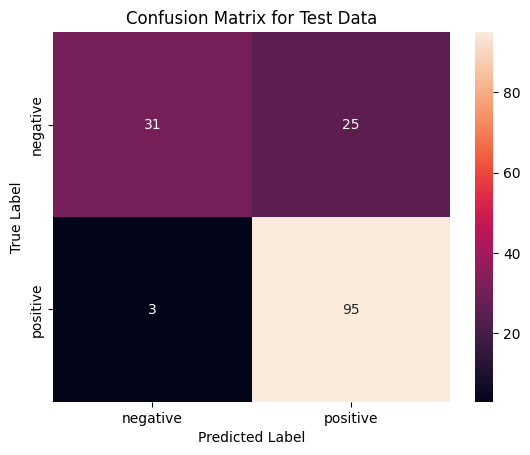

In [83]:
import pandas as pd
import matplotlib.pyplot as plt  # Perbaiki impor ini
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Test_Y, predictions_SVM)
class_label = ['negative', 'positive']
test = pd.DataFrame(conf_mat, index=class_label, columns=class_label)
sns.heatmap(test, annot=True, fmt="d")

plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")  # Perbaiki kesalahan penulisan "ylabel"
plt.show()


VISUALISASI

In [86]:
LawangSewuNeg = klasifikasiLawangSewu.loc[klasifikasiLawangSewu['label']==0]
LawangSewuNeg.head()

,Reviews,label
3,wisata edukasi mengunjungi anak,0
4,hotel malam giman bagus anakku,0
6,horor pengunjung pameran bagus terawat berkunj...,0
8,pintujendela hehe gedung masuk gedung kosong w...,0
16,alasan berkunjung langsung orang saksi peningg...,0


In [88]:
import difflib

neg_text_list = LawangSewuNeg['Reviews'].tolist()
reviews_neg = neg_text_list

In [90]:
#stopword

from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
print(len(english_stopwords))
text_neg = str(neg_text_list)

179


In [92]:
#MEMBUAT POTONGAN KATA

from nltk.tokenize import word_tokenize
tokens_neg = word_tokenize(text_neg)

In [94]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
negatice = [w for w in tokens_neg if not w in stop_words]
extend = 'a'
negative = [w for w in negative if not w in extend]

negative = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in negative]


In [95]:
import string
table = str.maketrans('','',string.punctuation)
strippedneg = [w.translate(table) for w in negative]

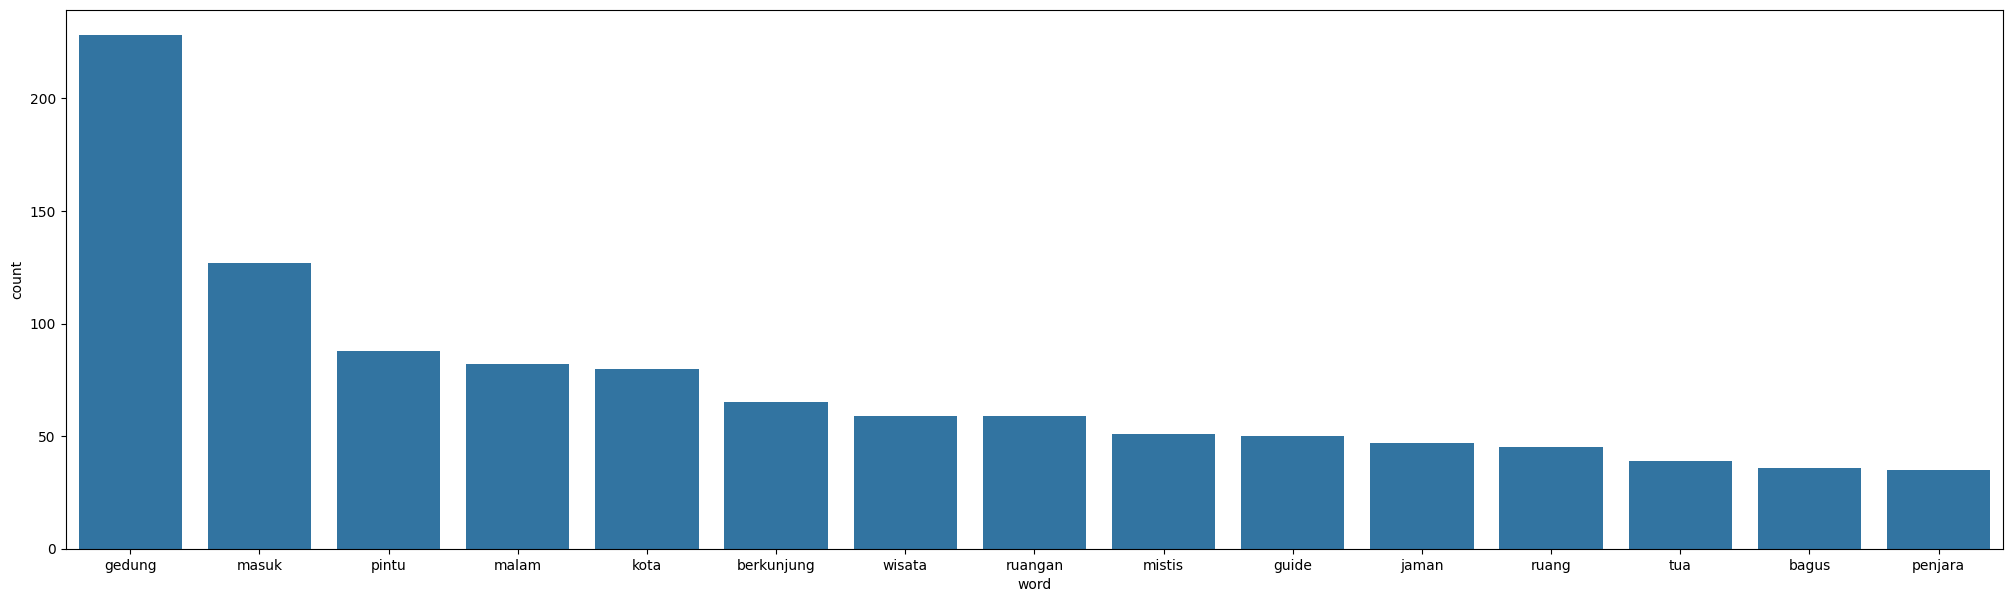

In [96]:
freq_words(strippedneg,15)

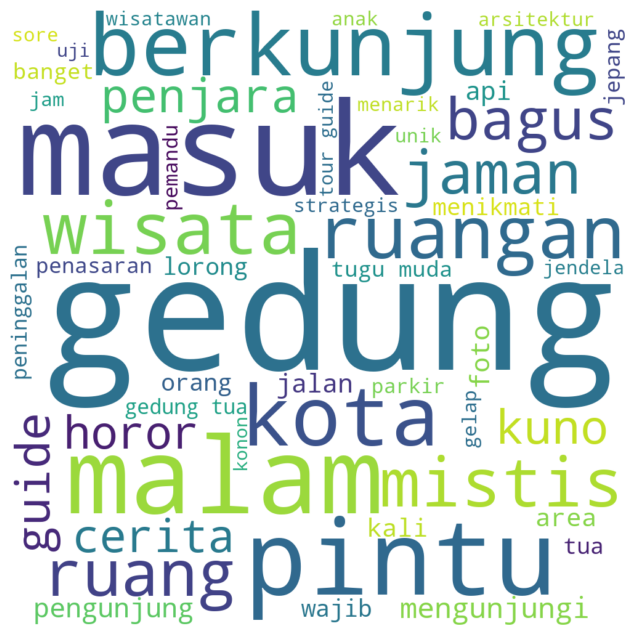

In [97]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt  # Tambahkan impor ini

all_text_negative = ' '.join(str(word) for word in strippedneg)
wordcloud = WordCloud(max_font_size=260, max_words=50, width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_negative)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()


SENTIMEN POSITIF

In [98]:
LawangSewuPos = klasifikasiLawangSewu.loc[klasifikasiLawangSewu['label']==1]
LawangSewuPos.head()

,Reviews,label
0,gedung berlantai bangun jendela jendela pintu ...,1
1,kali masuk bagus spot spot foto menarik gedung,1
2,mei jawa timur mampir berkunjung berfoto luas ...,1
5,wisata wajib kunjungi icon,1
7,gelap malam lampu romantis gedung gedungaura g...,1


In [100]:
import difflib

pos_text_list = LawangSewuPos['Reviews'].tolist()

reviews_pos = pos_text_list

In [101]:
#stopwords
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
print(len(english_stopwords))
text_pos = str(pos_text_list)

179


In [102]:
#membuat potongan kata(token)
from nltk.tokenize import word_tokenize
tokens_pos = word_tokenize(text_pos)

In [103]:
#filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
positive = [w for w in tokens_pos if not w in stop_words]
positive = [w for w in positive if not w in extend]

In [104]:
positive = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in positive]

In [105]:
import string
table = str.maketrans('','', string.punctuation)
strippedpos = [w.translate(table) for w in positive]

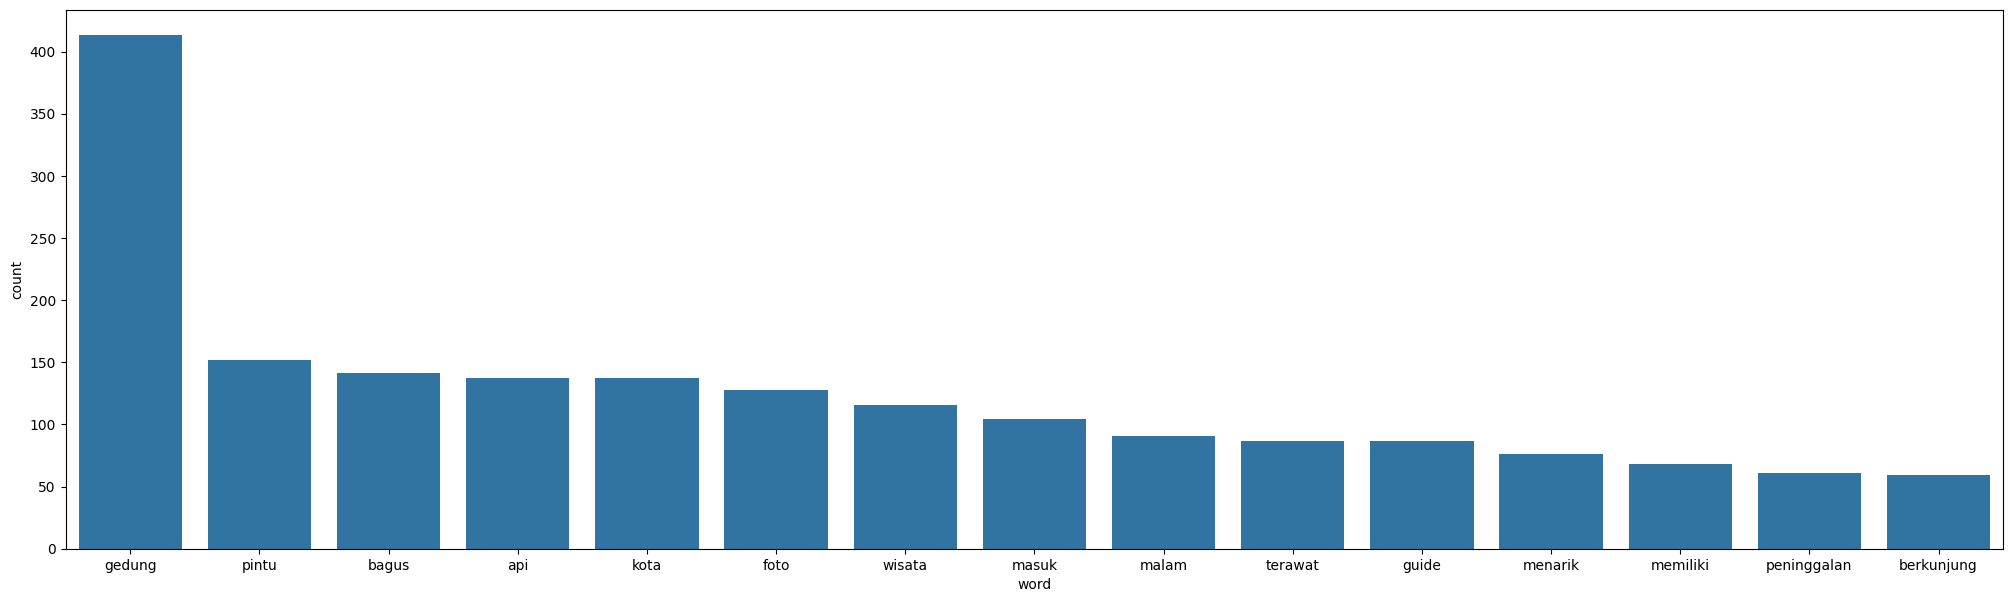

In [107]:
#memplot kata-kata yang paling sering muncul

freq_words(strippedpos,15)

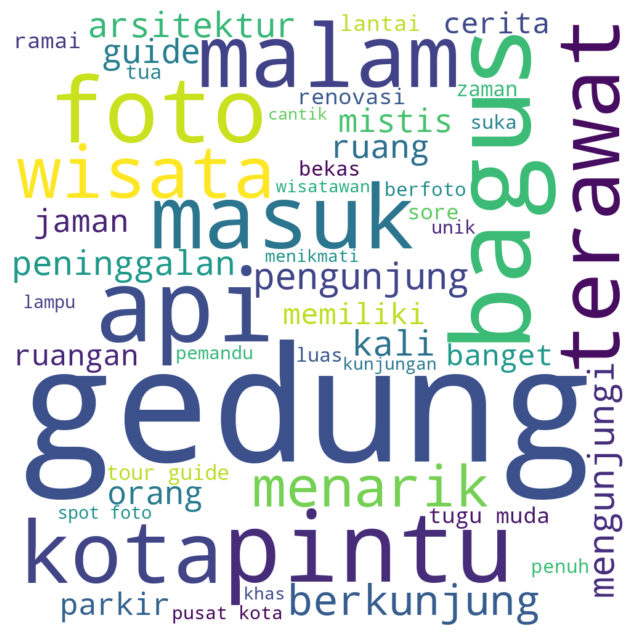

In [108]:
#WORDCLOUD POSITIF

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

all_text_positive = ' '.join(str(word) for word in strippedpos)
wordcloud = WordCloud(max_font_size=260, max_words=50, width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_positive)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()